Sliding Window

In [16]:
import timeit

In [17]:
s='pwwksaddfsfew'

In [18]:
%%timeit -n 10000
#Longest substring

a=str()
n=0
m=[]
for i in range(len(s)):
    if s[i] != a:
        n+=1
        a=s[i]
    elif s[i] == a:
        m.append(n)
        n=0
        a=s[i]
m.append(n)



1.33 µs ± 52.7 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [19]:
%%timeit -n 10000
sset, lptr, ans = set(), 0, 0
for rptr in range(len(s)):
    while s[rptr] in sset:
        sset.remove(s[rptr])
        lptr = rptr
    sset.add(s[rptr])
    window = rptr-lptr+1
    ans = max(ans, window)
# print(ans)

2.92 µs ± 28.7 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Best Time to Buy and Sell Stock

In [20]:
prices = [7,100,5,3,6,1,10]

In [21]:
%%timeit
ans=0
for i in range(len(prices)-1):
    for j in range(i,len(prices)):
        if prices[i]<prices[j]:
            ans = max(ans,prices[j]-prices[i])


2.98 µs ± 14 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [22]:
%%timeit -n 10000

lptr,rptr,maxProfit = 0,1,0
        
while rptr < len(prices):
    if prices[lptr] < prices[rptr]:
        ans = prices[rptr]- prices[lptr]
        maxProfit= max(ans,maxProfit)
    else:
        lptr= rptr
    rptr +=1

1.01 µs ± 23.3 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [23]:
min(10,21)

10

Minimum Window Substring

In [24]:
s = "ADOBECODEBANC"
t = "ABC"

In [25]:
hashT, hashS,ans, ansLength,left = {},{},[-1,-1], float("infinity"),0
for i in t:
    hashT[i] = 1+hashT.get(i,0)
t,v = 0, len(hashT)
for p in range(len(s)):
    i=s[p]
    hashS[i] = 1+hashS.get(i,0)
    if i in hashT and hashS[i] == hashT[i]:
        t+=1
    while t==v:
        if (p-left+1) < ansLength:
            ans = [left,p]
            ansLength = (p-left+1)
        hashS[s[left]] -=1
        if s[left] in hashT and hashS[s[left]] <hashT[s[left]]:
            t-=1
        left+=1
left,p = ans
s[left:p+1]

'BANC'

Repeated DNA Sequences

In [26]:
s = "AAAAACCCCCAAAAACCCCCCAAAAAGGGTTT"

In [27]:
nset, ans = set(),set()
for lptr in range(len(s)-9):
    window = s[lptr:lptr+10]
    if window in nset:
        ans.add(window)
    else:
        nset.add(window)
print(ans)

{'CCCCCAAAAA', 'AAAAACCCCC'}


Minimum Size Subarray Sum

In [28]:
target = 7
nums = [2,3,1,2,4,3]

In [29]:
%%timeit -n 10000
lptr, sumNO, ans = 0,0,float('inf')
for rptr in range(len(nums)):
    sumNO += nums[rptr]
    while sumNO >= target:
        window = rptr -lptr+1
        ans = min(ans,window)
        sumNO -= nums[lptr]
        lptr+=1

1.42 µs ± 33.1 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Binary Search

In [30]:
arr=[0, 20, 30, 50, 60, 80, 110, 130, 140, 170]
x = 110
def binarysearch(arr,x):
    low,high=0,len(arr)
    while True:
        mid = (low+high)//2
        print(arr[mid])
        if x==arr[mid]:
            return mid
        else:
            if (x>arr[mid]):
                low = mid+1
            else:
                high = mid-1
print(binarysearch(arr,x))

80
140
110
6


Sliding Window Maximum

In [31]:
import collections

In [32]:
nums = [1,3,-1,-3,5,3,6,7]
k = 3

In [33]:
%%timeit -n 10000
ans, lptr,rptr = [],0,0
qu = collections.deque()
while rptr < len(nums):
    while qu and nums[rptr] > nums[qu[-1]]:
        qu.pop()
    qu.append(rptr)
    if qu[0] < lptr:
        qu.popleft()
    if k<= (rptr+1):
        ans.append(nums[qu[0]])
        lptr+=1
    rptr+=1

2.52 µs ± 66.5 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [34]:
%%timeit -n 10000
ans=[]
k=3
for i in range(len(nums)-2):
    window = nums[i:i+k]
    ans.append(max(window))


1.11 µs ± 31.2 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Longest Repeating Character Replacement

In [35]:
s = "ABABABAB"
k = 3

In [36]:
charMap, ans, lptr = {},0,0
for rptr in range(len(s)):
    charMap[s[rptr]] = 1+charMap.get(s[rptr],0)
    window = (rptr-lptr+1)
    while k< window-max(charMap.values()):
        charMap[s[lptr]] -=1
        lptr+=1
    ans = max(window,ans)
print(ans)

IndexError: string index out of range

Fruit Into Baskets

In [ ]:
fruits = [0,0,0,1,2,2,2]

In [ ]:
mlen,currlen,lptr,uniquechr =0,0,0,0
mapCount = {}

for rptr in range(len(fruits)):
    mapCount[fruits[rptr]] = 1+mapCount.get(fruits[rptr],0)
    if mapCount[fruits[rptr]]==1:
        uniquechr+=1
    while uniquechr > 2:
        mapCount[fruits[lptr]] -=1
        if mapCount[fruits[lptr]]==0:
            uniquechr-=1
        lptr+=1

    currlen = rptr-lptr+1
    mlen = max(mlen,currlen)

print(mlen)

4


Backtracking

Generate Parentheses

In [ ]:
def generateparenthesis(n:int):
    stck,ans=[],[]
    def bt(openP, closeP):
        if openP < n:
            stck.append('(')
            bt(openP+1, closeP)
            stck.pop()
        if closeP < openP:
            stck.append(')')
            bt(openP,closeP+1)
            stck.pop()
        if closeP == openP == n:
            ans.append(" ".join(stck))
    bt(0,0)
    return ans

In [ ]:
print(generateparenthesis(3))

['( ( ( ) ) )', '( ( ) ( ) )', '( ( ) ) ( )', '( ) ( ( ) )', '( ) ( ) ( )']


In [ ]:

def subArraySum(arr, n, s): 
    summ=0
    lptr=0
    ans=[]
    for i in range(n):
        summ+=arr[i]
        while summ > s:
            summ-=arr[lptr]
            lptr+=1
        if summ==s:
            ans.extend([lptr,i])
            
    return ans
            

In [ ]:
print(subArraySum([1,2,3,4,5,6,7,8,9,10],10,15))

[0, 4, 3, 5, 6, 7]


Combination Sum

In [ ]:
def combinationsum(nums, target):
    ans=[]
    def csum(i,curr,total):
        if target==total:
            ans.append(curr.copy())
            return
        if total > target or i>=len(nums):
            return
        curr.append(nums[i])
        csum(i,curr,total+nums[i])
        curr.pop()
        csum(i+1,curr,total)
    csum(0,[],0)
    return ans

In [ ]:
combinationsum([2,3,6,7,1],7)

[[2, 2, 2, 1],
 [2, 2, 3],
 [2, 2, 1, 1, 1],
 [2, 3, 1, 1],
 [2, 1, 1, 1, 1, 1],
 [3, 3, 1],
 [3, 1, 1, 1, 1],
 [6, 1],
 [7],
 [1, 1, 1, 1, 1, 1, 1]]

Subsets

In [ ]:
nums = [1,2,3]
def subset(nums):
    ans, sub=[],[]
    def re(n):
        if n >= len(nums):
            ans.append(sub.copy())
            return
        sub.append(nums[n])
        re(n+1)
        sub.pop()
        re(n+1)
    re(0)
    return ans
print(subset(nums))

[[]]


Word Search

In [ ]:
board = [["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]]
word = "ABCCED"
def exist(board, word):

    row, col = len(board), len(board[0])
    visitPath = set()

    def wordSearch(r,c,i):
        if i == len(word):
            return True
        if ( (r<0 or c<0 or r >=row or c >=col or word[i]!= board[r][c] or \
            (r,c) in visitPath)):
            return False
        visitPath.add((r,c))
        ans = ( wordSearch(r+1,c, i+1) or  
                wordSearch(r,c-1, i+1) or 
                wordSearch(r-1,c, i+1) or
                wordSearch(r,c+1, i+1))
        visitPath.remove((r,c))
        return ans
    for r in range(row):
        for c in range(col):
            if wordSearch(r,c,0): 
                return True
    return False

exist(board, word)

True

In [ ]:
def isPerfect(n):
    sum=1
    i=2
    while i*i<=n:
        if n%i==0:
            sum=sum+i+n/i
        i+=1
    return (True if sum==n and n!=1 else False)

isPerfect(6)



True

In [ ]:
def isPrime(n):
    if (n==1 or n==0):
        return False
    for i in range(2,n):
        if n%i==0:
            return False
    return True

In [ ]:
isPrime(11)

True

In [ ]:
# Python3 program to display Prime numbers till N

#function to check if a given number is prime
def isPrime(n):
    #since 0 and 1 is not prime return false.
    if (n==1 or n==0):
        return False
        
    #Run a loop from 2 to square root of n.
    for i in range(2,int(n**(1/2))+1):
        #if the number is divisible by i, then n is not a prime number.
        if(n%i==0):
            return False
        
    #otherwise, n is prime number.
    return True



# Driver code
N = 100
#check for every number from 1 to N
for i in range(1,N+1):
#check if current number is prime
    if(isPrime(i)):
	    print(i,end=" ")


2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97 

In [ ]:
# Python3 program to display Prime numbers till N

#function to check if a given number is prime
def isPrime(n):
    #since 0 and 1 is not prime return false.
    if(n==1 or n==0):
        return False
        
    #Run a loop from 2 to n-1
    for i in range(2,n):
        #if the number is divisible by i, then n is not a prime number.
        if(n%i==0):
            return False
        
    #otherwise, n is prime number.
    return True



# Driver code
N = 100;
#check for every number from 1 to N
for i in range(1,N+1):
#check if current number is prime
    if(isPrime(i)):
        print(i,end=" ")


2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97 

In [ ]:
isPrime(9)

False

In [ ]:
def a(n):
    print("starting")
    for i in range(n):
        yield i


In [ ]:
range(10)

SyntaxError: can't use starred expression here (<ipython-input-50-822f3c7b2e82>, line 1)

In [ ]:
status= True
def gernator():
    sum=0
    while status:
        yield sum
        sum+=1

In [ ]:
x = gernator()

In [ ]:
status =False

In [ ]:
for i in range(10):
    try:
        print(next(x))
    except:
        print('stop iteration')
        break


stop iteration


In [ ]:
def var(a,*args,**kwarg):
    print(a)
    print("arg")
    print([v for v in args])
    print("kwarg")
    r= [{k:v} for k,v in kwarg.items()]
    print(r)
    return r

In [ ]:
r = var("acb","1","2","3",test1="val1",test2="val2")

acb
arg
['1', '2', '3']
kwarg
[{'test1': 'val1'}, {'test2': 'val2'}]


In [ ]:
r[0]['test1']

'val1'

In [ ]:
class car():
    def __init__(self, **kwargs):
        self.speed = kwargs['s']
        self.color = kwargs['c']

In [ ]:
car1 = car(s=100,c='color')

In [ ]:
car1.color

'color'

In [ ]:
class suspension(car):
    def __init__(self,t):
        self.spring = t

In [ ]:
def shout(text):
    if len(text) >1:
        raise ValueError
    return text.upper()
def whisper(text):
    return text.lower()

def greet(func, *args):
    how = func(args)
    print(how)



In [ ]:
from functools import wraps

In [ ]:
def logger(func):
    def log_func(*args):
        print(func(*args))

    return log_func

def add(x,y):
    return x+y

In [ ]:
add_logg = logger(add)
add_logg.__name__


'log_func'

In [ ]:
ans = add_logg(3,2)
ans

5


In [ ]:
def divide(a:int, b:int = 10) -> float:
    return a/b

In [ ]:
divide(5,2)

2.5

In [ ]:
from collections import defaultdict

In [ ]:
d = defaultdict(lambda: "qweqwe")

In [ ]:
d['asd']

'qweqwe'

In [ ]:
def is_call():
    print("call")
    a=10
    def is_returned():
        print("Somethings",a)
    return is_returned

new_func = is_call()

call


In [ ]:
new_func()

Somethings 10


In [ ]:
def ask_question(func, *args,**kwargs):
    print("get into ask def")
    def wrapper( *args,**kwargs):
        print("I got decorator")
        func()
        print("what")
    return wrapper

@ask_question
def say_hi():
    print("asd")

get into ask def


In [ ]:
say_hi("Hi!")

I got decorator
asd
what


In [ ]:
ask = ask_question(say_hi, "Bye!!!")

get into ask def


In [ ]:
def smart_devide(func):
    def wrapper(*args, **kwargs):
        a,b=args
        print(f"Devide {a}, {b}")
        if b==0:
            print("cant devide")
            return None
        func(*args,**kwargs)
    return wrapper

@smart_devide
def devide(a,b):
    print(a/b)
    

In [ ]:
devide(2,0)

Devide 2, 0
cant devide


In [ ]:
def star(func):
    def wrapper(*args,**kwargs):
        print("*"*30)
        func(*args,**kwargs)
        print("*"*30)
    return wrapper

def line(func):
    def wrapper(*args,**kwargs):
        print("-"*30)
        func(*args,**kwargs)
        print("-"*30)
    return wrapper

@star
@line
def print_msg(text):
    print(text)

print_msg('Hello')

******************************
------------------------------
Hello
------------------------------
******************************


In [ ]:
msg = star(line(print_msg))
msg("hellooo")

******************************
------------------------------
******************************
------------------------------
hellooo
------------------------------
******************************
------------------------------
******************************


In [ ]:
def deco_with_arg(d_arg1,d_arg2):
    def decorator(func):
        @wraps(func)
        def wrapper(f_arg1,f_arg2):
            "This is the wrapper function"
            print("The wrapper can access all the variables")
            print(f"\t- from the decorator maker: {d_arg1} {d_arg2}")
            print(f"\t- from the function call: {f_arg1} {f_arg2}")
            print("and pass them to the decorated function\n")
            return func(f_arg1,f_arg2)
        return wrapper
    return decorator

@deco_with_arg("Hello","this is arg of deco")
def deco_function(f_arg1,f_arg2):
    print("This is the decorated function and it only knows about its arguments:")
    print(f"{f_arg1} {f_arg2}")

deco_function("Hi",'this arg of function')

The wrapper can access all the variables
	- from the decorator maker: Hello this is arg of deco
	- from the function call: Hi this arg of function
and pass them to the decorated function

This is the decorated function and it only knows about its arguments:
Hi this arg of function


In [ ]:
deco_function.__name__

'deco_function'

In [ ]:
class Supermarket:
    product = "Milki"
    def __init__(self, product, best_before):
        self.best_before = best_before
        self.product = product

    @staticmethod
    def normalize_product(product):
        product = product.capitalize().strip()
        return product

    
    def normalize_product_no(product):
        product = product.capitalize().strip()
        return product

    @classmethod
    def get_product(cls):
        print(cls.product)

    def get_product_no(cls):
        print(self.product)

In [ ]:
ob = Supermarket("bread","2020")
ob.product

'bread'

In [ ]:
ob.normalize_product("Qweqwe")

'Qweqwe'

In [ ]:
Supermarket("bread","2020").normalize_product_no("milk")

AttributeError: 'Supermarket' object has no attribute 'normalize_product_no'

In [ ]:
ob.get_product()

Milki


In [ ]:
Supermarket.get_product()

Milki


In [ ]:
Supermarket.get_product_no()

NameError: name 'self' is not defined

In [ ]:
class Supermarket:    
    def __init__(self, product, best_before):
        self.best_before = best_before
        self.product = product
    
    @classmethod    
    def add_product(cls):
        return cls("Bread", "2022-05-29")
    
    @staticmethod
    def normalize_product(product):
        product = product.capitalize().strip()
        return product

In [ ]:
obj = Supermarket.add_product()
obj.product

'Bread'

In [ ]:
Supermarket.normalize_product("bababa")

'Bababa'

In [ ]:
assert "asd"

In [ ]:
def reverse(text):
    for char in range(len(text)-1,-1,-1):
        yield text[char]

def count():
    n=0
    while True:
        yield n
        n+=1

In [ ]:
a=reverse("abcd")

In [ ]:
b = count()

In [ ]:
next(b)

4

In [ ]:
generator = (x**2 for x in [1,2,3,4,5,6,7])

In [ ]:
for i in generator:
    print(i)

1
4
9
16
25
36
49


In [ ]:
sum(generator)

0

In [ ]:
def divide(x,y):
    if x==0:
        raise ZeroDivisionError("aslkdjalsdkj")
    try:
        result = x//y
        print("REsult :",result)
    # except TypeError:
    #     print("stringgggggg")
    except ZeroDivisionError:
        print("Zero error naja")
    else:
        print(x)
    finally:
        print("ariakodai")

In [ ]:
divide(4,0)

Zero error naja
ariakodai


In [ ]:
x=[123,43,2,1,237,53,657,789,90,5345,654,34,213]

def binary_search(x,num):
    start,end = 0,len(x)
    midd=0
    for _ in range(len(x)-1):
        
        mid = (start+end)//2
        if midd ==mid:
            print("Nonum")
            return None
        #print(mid)
        if num == x[mid]:
            return num

        else:
            if num in x[:mid]:
                end=mid
                midd=mid
            else:
                start=mid
                midd=mid

In [ ]:
binary_search(x,122)

6
9
11
12
Nonum


In [ ]:
for num in x:
    print(num==binary_search(x,num))

True
True
True
True
True
True
True
True
True
True
True
True
True


In [ ]:
def splitArray( nums: list[int], m: int) -> int:
    def testSplit(maxm):
        temp,currSum = 0,0
        for no in nums:
            currSum += no
            if currSum > maxm:
                temp += 1
                currSum = no
        return temp +1 <= m
    
    
    left,right= max(nums),sum(nums)
    ans = right
    
    while left<=right:
        mid = left + ((right - left)//2)
        if testSplit(mid):
            ans = mid
            right = mid-1
        else:
            left = mid +1 
    return ans

In [ ]:
nums = [7,2,5,10,8]
k=2
print(splitArray(nums,3))

14


In [ ]:
sum(nums)

32

In [ ]:
def rob(nums: list[int]) -> int:
    def robhelper(nums):
        rob1, rob2, rob3 = 0,0,0
        for n in nums:
            ans = max(rob1+n, rob2, rob3)
            rob1 =rob2
            rob2=rob3
            rob3=ans
        return rob3
    return max(nums[0], robhelper(nums[2:]), robhelper(nums[:-2]))

nums=[10,1,2,5,1,5,1,1,20,1,1]

print(rob(nums))

35


In [ ]:
def rob( nums: list[int]) -> int:
    # edge cases:
    if len(nums) == 0: return 0
    if len(nums) == 1: return nums[0]
    if len(nums) == 2: return max(nums)
    
    # dynamic programming - decide each problem by its sub-problems:
    dp = [0]*len(nums)
    dp[0] = nums[0]
    dp[1] = max(nums[0], nums[1])
    for i in range(2, len(nums)):
        dp[i] = max(dp[i-1], nums[i]+dp[i-2])
    print(dp)
    return dp[-1]

In [ ]:
nums=[10,1,2,5,1,5,1,1,20,1,1]
print(rob(nums))

[10, 10, 12, 15, 15, 20, 20, 21, 40, 40, 41]
41


In [ ]:
def coinChange(coins:list[int], amount:int) -> int:
    ans= [amount+1]*(amount+1)
    # print(ans)
    ans[0]=0
    for amt in range(1,amount+1):
        for cn in coins:
            if amt-cn>=0:
                ans[amt]=min(ans[amt],1+ans[amt-cn])
    return ans[amount] if ans[amount] != amount+1 else -1

In [ ]:
coinChange(coins=[7,9,10], amount=93)

[94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94]


10

In [ ]:
nums = [-2,1,-3,4,100,-2,1,-5,4]
curSum = maxSum = nums[0]
for num in nums[1:]:
    curSum = max(num, curSum+num)
    maxSum = max(maxSum, curSum)


print(maxSum)



104


In [ ]:
target = 7
nums = [2,3,1,2,4,3]
l=0
summ=0
lptr=0
for rptr in range(len(nums)):
    summ+= nums[rptr]
    while summ>target:
        summ-=nums[lptr]
        lptr+=1
    print(summ)
    if summ==target:
        l = max(l,rptr-lptr)
            
print(l)


2
5
6
6
7
7
3


In [ ]:
n=3
count=0
def rep(t,n):
    ls=[]
    if n<=0:
        print(t)
        if "11" in t:
            global count
            count+=1
        return t
    t_0=t+"0"
    t_1=t+"1"
    t_2=t+"2"
    return rep(t_0,n-1)+" "+rep(t_1,n-1)+" "+rep(t_2,n-1)
    


In [ ]:
rep("",2)

00
01
02
10
11
12
20
21
22


'00 01 02 10 11 12 20 21 22'

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#Initialize param
# y = w*x+b
#loss_func = (y-y_pred)**2/n RMSE
#update weight diff_loss*learning_rate

x = np.random.randn(100,1)
y = 2*x+10
w=0
b=0
loss_=[]
def update_weight(b,w,x,y,lr=0.01):
    diff_w,diff_b = 0,0
    for x_i,y_i in zip(x,y):
        y_pred = w*x_i+b
        diff_w += 2*(y_i-y_pred)*(-x_i)
        diff_b += -2*(y_i-y_pred)
    w -= diff_w*lr/x.shape[0]
    b -= diff_b*lr/x.shape[0]
    
    return w,b

for epoch in range(100):
    w,b = update_weight(b,w,x,y)
    #print(w)
    y_pred = w*x+b
    loss = np.sum((y-y_pred)**2)/x.shape[0]
    loss_.append(loss)
    print(f"epoch:{epoch} loss={loss}")

epoch:0 loss=95.0925809545667
epoch:1 loss=91.479049296298
epoch:2 loss=88.00455387883841
epoch:3 loss=84.6636583759502
epoch:4 loss=81.45114333357549
epoch:5 loss=78.36199730711614
epoch:6 loss=75.39140837101992
epoch:7 loss=72.53475598455906
epoch:8 loss=69.78760319840653
epoch:9 loss=67.1456891873008
epoch:10 loss=64.60492209474539
epoch:11 loss=62.16137217631266
epoch:12 loss=59.811265228718455
epoch:13 loss=57.55097629240212
epoch:14 loss=55.37702361588939
epoch:15 loss=53.28606287073367
epoch:16 loss=51.2748816063256
epoch:17 loss=49.34039393433253
epoch:18 loss=47.47963543298031
epoch:19 loss=45.68975826181983
epoch:20 loss=43.968026478030914
epoch:21 loss=42.31181154570888
epoch:22 loss=40.71858802995277
epoch:23 loss=39.18592946793218
epoch:24 loss=37.71150440945052
epoch:25 loss=36.293072619848886
epoch:26 loss=34.928481438405875
epoch:27 loss=33.6156622856861
epoch:28 loss=32.35262731357426
epoch:29 loss=31.137466192002897
epoch:30 loss=29.968343026641275
epoch:31 loss=28.84

<AxesSubplot:>

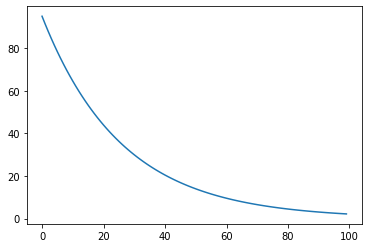

In [ ]:
pd.Series(loss_).plot()


In [ ]:
def quick_sort(collection):
  
    length = len(collection)
    if length <= 1:
        return collection
    else:
        # Use the last element as the first pivot
        pivot = collection.pop()
        # Put elements greater than pivot in greater list
        # Put elements lesser than pivot in lesser list
        greater, lesser = [], []
        for element in collection:
            if element > pivot:
                greater.append(element)
            else:
                lesser.append(element)
        return quick_sort(lesser) + [pivot] + quick_sort(greater)

In [ ]:
fruits=[1,2,3,3,2,2,4,4,4,4,3,3,3,3]

def totalfruits(fruits):
        maxlen,locallen,l,unique=0,0,0,0
        count={}
        for r,v in enumerate(fruits):
                if v not in count.keys() or count[v] == 0:
                        unique+=1
                count[v] = 1+count.get(v,0)
                # if count[fruits[r]] == 1:
                #         unique+=1

                while unique >2:
                        count[fruits[l]]-=1
                        if count[fruits[l]] == 0:
                                unique-=1
                        l+=1
                locallen = r-l+1
                maxlen = max(maxlen,locallen)

        return maxlen

In [ ]:
totalfruits([3,3,3,1,2,1,1,2,3,3,4])

5

In [ ]:
s = "pwwkew"
l=0
maxlen=0
count={}
for r,v in enumerate(s):
    count[v] = 1+count.get(v,0)
    while count[v] >1:
        count[s[l]]-=1
        l+=1
    lenn = r-l+1
    maxlen = max(maxlen,lenn)
print(maxlen)

3


In [ ]:
n= 10100101000001111010011100
res = 0
for _ in range(32):
    res = (res<<1) + (n&1)
    n>>=1

print(res)

1004991007


In [ ]:
print(res)
print(res<<1)
print(n>>=1)

SyntaxError: invalid syntax (<ipython-input-129-facfc6c054c3>, line 3)

In [ ]:
1003&2

2

In [ ]:
ans=[]
count=0
def per(text,n):
    if n>0:
        count_1 = per(text+"0",n-1)
        count_2 = per(text+"1",n-1)
    else:
        count=0
        if "11" in text:
            count+=1
        ans.append(text)
        return count
    return count_1+count_2


for i in range(10):
    print(per("",i))

0
0
1
3
8
19
43
94
201
423


In [ ]:
ans,count

(['000', '001', '010', '011', '100', '101', '110', '111'], 0)

NameError: name 'text' is not defined

In [ ]:

summ=0
for num in nums:
    summ+=num

In [ ]:
nums=[1,5,11,5]
def canPartition(nums):
    total = sum(nums)
    if total%2 != 0 :
        return False
    target = total//2
    dp = [False]*(target+1)
    dp[0]= True
    for num in nums:
        for i in range(target, num-1, 1):
            if dp[target]: return True
            dp[i] = dp[i] or dp[i-num]


    return dp[target]
canPartition(nums)

False

In [ ]:
sum(nums)%2 ==False

True

In [ ]:
def climbstair(n):
    count=0
    if n>=0:
        if n==0:
            count+=1
            return count
        count_1 = climbstair(n-1)
        count_2 = climbstair(n-2)
        return count_1+count_2
    return 0
        
    
climbstair(4)

5

In [ ]:
def climbstair(n):
    if n<=0:return 0
    if n==1:return 1
    if n==2:return 2

    one =2
    two =1
    all =0
    for i in range(2,n):
        all = one+two
        two = one
        one = all
    return all
for i in range(10):
    print(climbstair(i))

0
1
2
3
5
8
13
21
34
55


In [ ]:
def climb(n):
    dic={1:1,2:2}
    if n not in dic:
        dic[n] = climb(n-1)+climb(n-2)
    return dic[n]
climb(38)

    


63245986

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

import random
import time

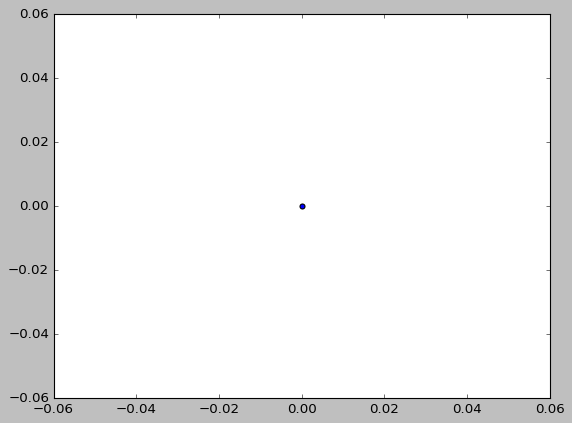

In [ ]:
x = 0
y = 0
plt.scatter(x,y)

In [ ]:
def randomxy():
    x = random.randint(1,50)
    y = random.randint(1,50)
    return (x,y)
def minimize_loss(x_true,y_true, lr=0.1):
    plt.ion()
    plt.axis([0,100,0,100])
    plt.scatter(x_true,y_true,c='red', marker='x')
    x,y = randomxy()
    # loss_x = (x_true-x)**2
    # loss_y = (y_true-y)**2

    for i in range(10):
        # plt.cla()
        # plt.axis([0,100,0,100])
        # plt.scatter(x_true,y_true,c='red', marker='x')
        loss_x_diff = -2*(x_true-x)
        loss_y_diff = -2*(y_true-y)
        x -= lr*loss_x_diff
        y -= lr*loss_y_diff
        plt.scatter(x,y)
        plt.draw()
        
        time.sleep(0.1)
        

    

    

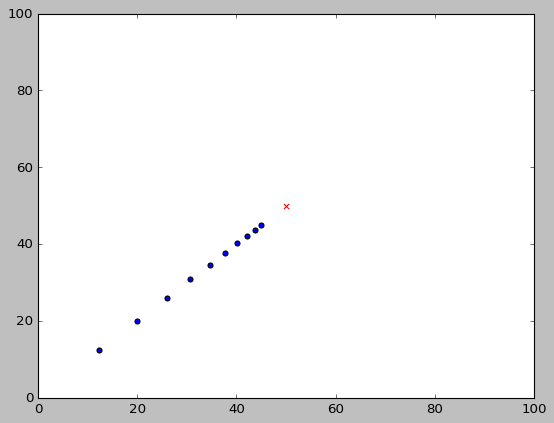

In [ ]:
minimize_loss(50,50)

In [ ]:
a =10011011
ans=0
x=0
while a>0:
    n = a%2
    ans+= n*2**x
    x+=1
    a = a//10
print(ans)


155


In [ ]:
bi=bin(10)
print(int(bi,2))

10


In [ ]:
def fruitsBaskets(fruits):
    counter = {}
    maxlen=l=unique=0
    for r in range(len(fruits)):
        counter[fruits[r]] = 1+counter.get(fruits[r],0)
        if counter[fruits[r]] == 1:
            unique+=1
        while unique >2:
            counter[fruits[l]]-=1
            if counter[fruits[l]] == 0:
                unique-=1
            l+=1
        maxlen = max(maxlen,r-l+1)
    return maxlen

fruits=[1,2,1,0,0,1,2]
fruitsBaskets(fruits)

4

In [ ]:
def combination(n):
    ans =[]
    text=""
    count=0
    def add(ans,text,n):
        if n>0:
            add(ans,text+"0",n-1)
            add(ans,text+"1",n-1)
        else:
            
            if "11" in text:
                global count
                count+=1
            ans.append(text)
    add(ans,text,n)
    return ans,count
    
combination(3)

(['000', '001', '010', '011', '100', '101', '110', '111'], 0)

In [ ]:
nums = [-2,1,-3,4,-1,2,1,-5,4]
localmax=maxx=0
for num in nums:
    localmax = max(num+localmax, num)
    maxx = max(localmax,maxx)
print(maxx)

6


In [ ]:
s = "BAAAAB" 
k = 2
def longest(s,k):
    l=window=maxx=0
    counter={}
    for r in range(len(s)):
        counter[s[r]] = 1+counter.get(s[r],0)
        # window = max(window, counter[s[r]])
        window = max(window,counter[s[r]])
        if (r-l+1-window) > k:
            counter[s[l]] -=1
            l+=1
        maxx = max(maxx,r-l+1)

    return maxx
longest(s,k)


6

In [ ]:
import math
def coinChange(coins: list[int], amount: int) -> int:        
    dp=[math.inf] * (amount+1)
    dp[0]=0
    
    for coin in coins:
        for i in range(coin, amount+1):
            if i-coin>=0:
                dp[i]=min(dp[i], dp[i-coin]+1)
    
    return -1 if dp[-1]==math.inf else dp[-1]
coins=[1,2,5]
amount=11
coinChange(coins,amount)
                

3

In [ ]:
def coinChange( coins: list[int], amount: int) -> int:            
    def coinChangeInner(rem, cache):
        if rem < 0:
            return math.inf
        if rem == 0:                    
            return 0       
        if rem in cache:
            return cache[rem]
        
        cache[rem] = min(coinChangeInner(rem-x, cache) + 1 for x in coins)                         
        return cache[rem]      
    
    ans = coinChangeInner(amount, {})
    return -1 if ans == math.inf else ans
coins=[1,2,5]
amount=11
coinChange(coins,amount)

3

In [ ]:
nums=[1,3]
target=3
def rotated_sorted_array(nums,target):
    start = 0
    end = len(nums)-1
    while start<=end:
        # print(nums[start:end+1])
        mid = (start+end)//2
        if nums[mid] == target:
            return mid
        elif nums[mid] > target:
            if nums[start] < nums[mid] and nums[mid]>nums[end]:
                start = mid+1
            else:
                end = mid-1 
        elif nums[mid] < target:
            if nums[start] <nums[mid] and nums[mid]>nums[end]:
                start = mid+1
            else:
                end = mid-1
                
    return -1
rotated_sorted_array(nums,target)

-1

In [ ]:
def countsetbit(n):
    count=0
    while (n):
        count +=n&1
        n>>=1
    return count
countsetbit(2)

1

In [ ]:
1011^11


1016

In [ ]:
a="11000101"
b="10000000"
carry=0
int(a[0])^int(b[1])^0



1

In [ ]:
def isPowerOfTwo(n):
    cnt = 0
    while n > 0:
        print(n&1)
        if n & 1 == 1:
            cnt = cnt + 1
        n = n >> 1
 
    if cnt == 1:
        return 1
    return 0
isPowerOfTwo(4)

0
0
1


1

In [ ]:
100&

96

In [ ]:
string = "".join(map(str,[1,0,0]))
a = str(int(string)+1)
ans = [x for x in a]
ans

[1, 0, 1]

In [ ]:
def countBit(n):
    counter=[0]
    for i in range(1,n+1):
        print(i,counter[i>>1], i%2)
        counter.append(counter[i>>1]+i%2)
    return counter
countBit(10)

1 0 1
2 1 0
3 1 1
4 1 0
5 1 1
6 2 0
7 2 1
8 1 0
9 1 1
10 2 0


[0, 1, 1, 2, 1, 2, 2, 3, 1, 2, 2]

In [ ]:
10>>1

5

In [ ]:
def countBit(n):
    ans=[0]
    for i in range(1,n+1):
        h = ans[i>>1]
        if i&1==1:
            h+=1
        ans.append(h)
    return ans

countBit(21)

[0, 1, 1, 2, 1, 2, 2, 3, 1, 2, 2, 3, 2, 3, 3, 4, 1, 2, 2, 3, 2, 3]

In [ ]:
nums = [3,0,1]
def missingNumber(nums):
    for i in range(len(nums)+1):
        


1

In [ ]:
reduce(lambda x,y: x ^ y, list(range(len(nums)+1)) + nums)

NameError: name 'reduce' is not defined

In [ ]:
nums=[3,0,1]
lis = list(range(len(nums)+1)) + nums
lis

[0, 1, 2, 3, 3, 0, 1]

In [ ]:
functools.reduce(lambda x,y: x ^ y, list(range(len(nums)+1)) + nums)

2

In [ ]:
nums=[41,42,45,43,46,44]

lis = list(range(41,min(nums)+len(nums)+1)) + nums
lis
for i in range(len(lis)-1):
    lis[i+1] = lis[i]^lis[i+1]
    # print(lis[i+1])
lis[-1]

47

In [ ]:
for i in range(10):
    print(i^i+1^i+2, i,i+1,i+2)

3 0 1 2
0 1 2 3
5 2 3 4
2 3 4 5
7 4 5 6
4 5 6 7
9 6 7 8
6 7 8 9
11 8 9 10
8 9 10 11


In [ ]:
import pandas as pd
import json

In [ ]:
df = pd.read_csv("/Users/natapollimpananuwat/Desktop/Project_Dsci/Tellme/tellme_data.csv", index_col=0)
df

<ipython-input-43-35509574e49a>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/natapollimpananuwat/Desktop/Project_Dsci/Tellme/tellme_data.csv", index_col=0)


,shop_code,shop_name,shop_province,sale_date,member_code,birth_year,start_year,member_province,product_code,product_color,product_name_x,quantity,price,category_name,age,value,member_part,shop_part
0,4667,สินทรัพย์ทอง สงขลา,สงขลา,2019-12-04,10066720,1961.0,2011.0,ตรัง,9531,3,Tellme สมูธ แวร์ ลูส เพาเดอร์,2,575.0,แป้งฝุ่น,61,1150.0,S,S
1,4667,สินทรัพย์ทอง สงขลา,สงขลา,2019-12-04,10066720,1961.0,2011.0,ตรัง,9572,21,Tellme บลัชออน รีฟิล ใหญ่,1,250.0,ผลิตภัณฑ์แต่งหน้า,61,250.0,S,S
2,3779,โรบินสัน สกลนคร,สกลนคร,2019-11-19,10076238,1964.0,2013.0,ขอนแก่น,9618P899,7,Tellme สมูธแอสซิลค์ ทูเวย์(รีฟิลพร้อมสปองค์),1,899.0,แป้งทู-เวย์,58,899.0,NW,NW
3,3214,โรบินสัน กาญจนบุรี,กาญจนบุรี,2020-02-17,4121117780,1981.0,2004.0,กาญจนบุรี,9786,,Tellme สมูธแอสซิลค์ ซันโพรเท็คชั่น ครีม,1,1900.0,ครีมกันแดด,41,1900.0,E,E
4,3214,โรบินสัน กาญจนบุรี,กาญจนบุรี,2020-02-17,4121117780,1981.0,2004.0,กาญจนบุรี,9825,120,Tellme ยาทาเล็บ,1,89.0,อื่นๆ,41,89.0,E,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550859,1326,โรบินสัน ศรีนครินทร์,กรุงเทพมหานคร,2019-12-23,1322132255,1947.0,2006.0,กรุงเทพมหานคร,9551N,064,Tellme อายเชโดว์ รีฟิล,1,140.0,ผลิตภัณฑ์แต่งหน้า,75,140.0,C,C
550860,1326,โรบินสัน ศรีนครินทร์,กรุงเทพมหานคร,2019-12-23,1322132255,1947.0,2006.0,กรุงเทพมหานคร,9552,005,Tellme อายเชโดว์ รีฟิล ใหญ่,2,180.0,ผลิตภัณฑ์แต่งหน้า,75,360.0,C,C
550861,4667,สินทรัพย์ทอง สงขลา,สงขลา,2019-12-04,4663114055,1964.0,2004.0,สงขลา,6517,3,Tellme ยูวีไวท์ฯ ทูเวย์(รีฟิลพร้อมสปองค์),2,900.0,แป้งทู-เวย์,58,1800.0,S,S
550862,3094,มาร์คโฟร์ แพร่,แพร่,2019-11-25,3094115280,1962.0,2004.0,แพร่,9381,S14,Tellme สมูธแอสซิลค์ ลิปสติก,1,535.0,ลิปสติก,60,535.0,N,N


In [ ]:
df_new = df[df.sale_date>"2020"].reset_index(drop=True)
df_new.to_csv("/Users/natapollimpananuwat/Desktop/Project_Dsci/Tellme/tellme_data copy.csv")

In [ ]:
result = df.sample(2).to_json(orient='records')
# print(result)
parsed = json.loads(result)
parsed
# json.dumps(parsed, indent=4)

[{'shop_code': 4114,
  'shop_name': 'อัมพร อยุธยา',
  'shop_province': 'พระนครศรีอยุธยา',
  'sale_date': '2021-01-25',
  'member_code': 10078175,
  'birth_year': 1965.0,
  'start_year': 2013.0,
  'member_province': 'พระนครศรีอยุธยา',
  'product_code': 'A36638  ',
  'product_color': '6   ',
  'product_name_x': 'SUNWAY ลิปกลอส มอยส์เจอร์ไรเซอร์',
  'quantity': 1,
  'price': 39.0,
  'category_name': 'ลิปสติก',
  'age': 57,
  'value': 39.0,
  'member_part': 'C',
  'shop_part': 'C'},
 {'shop_code': 3502,
  'shop_name': 'นานาภัณฑ์ ยโสธรพลาซ่า',
  'shop_province': 'ยโสธร',
  'sale_date': '2020-05-26',
  'member_code': 3501000135,
  'birth_year': 1966.0,
  'start_year': 1999.0,
  'member_province': 'ยโสธร',
  'product_code': '6517    ',
  'product_color': '2   ',
  'product_name_x': 'Tellme ยูวีไวท์ฯ ทูเวย์(รีฟิลพร้อมสปองค์)',
  'quantity': 2,
  'price': 900.0,
  'category_name': 'แป้งทู-เวย์',
  'age': 56,
  'value': 1800.0,
  'member_part': 'NW',
  'shop_part': 'NW'}]

In [ ]:
def threeSum( nums: list[int]) -> list[list[int]]:
    nums.sort()
    ans=set()
    for i in range(len(nums)):
        target = 0-nums[i]
        l = i+1
        r=len(nums)-1
        while l<r:
            if nums[l] +nums[r] == target:
                ans.add((nums[i],nums[l],nums[r]))
                l+=1
                r-=1
            elif nums[l]+nums[r] > target:
                r-=1
            else:
                l+=1
    return ans
threeSum([-1,0,1,2,-1,-4])

{(-1, -1, 2), (-1, 0, 1)}

In [ ]:
def threeSum( nums: list[int]) -> list[list[int]]:
    nums.sort()
    ans=set()
    dic=[]
    for i in range(len(nums)):
        target = -nums[i]
        l=i+1
        r=len(nums)-1
        
        while r>l:
            k=nums[r]+nums[l]
            if k in dic:
                ans.add((dic[k],nums[r],nums[l]))
                r-=1
                l+=1
            else:
                dic[]
                l+=1


    return ans

threeSum([-1,0,1,2,-1,-4])

In [ ]:
d={}
d[0]=(2+3)
d

{0: 5}

In [ ]:
a = [4,32,1,4]
a.sort()
a

[1, 4, 4, 32]

In [ ]:
def maxArea( height: list[int]) -> int:
    maxx=l=0
    for r in range(1,len(height)):
        if height[r]>height[l]:
            area = height[l]*(r-l)
            maxx = max(maxx,area)
            n=r+1
            while n<len(height):
                h = min(height[l],height[n])
                area = h*(n-l)
                maxx = max(maxx,area)
                n+=1
            l=r
        else:
            area = height[r]*(r-l)
            maxx = max(maxx,area)

    return maxx

maxArea(height=[1,8,6,2,5,4,8,25,7])

49

In [ ]:
height=[1,8,6,2,5,4,8,25,7]
10<len(height)

False

In [ ]:
nums=[2,7,11,15]
target=9
def twoSum(nums,target):
    rev_table = dict()
    for i in range(len(nums)):
        second_addend = target - nums[i]
        if second_addend in rev_table:
            return [rev_table[second_addend], i]
        else:
            rev_table[nums[i]] = i
twoSum(nums,target)

[0, 1]

In [ ]:
haystack = "missisipy"
needle = "sisip"
def strStr(haystack, needle):
    if len(needle)>len(haystack):
        return -1
    window = len(needle)
    for i in range(len(haystack)-window+1):
        # print(haystack[i:i+window])
        if haystack[i:i+window] == needle:
            return i
    return -1


strStr(haystack, needle)


3

In [ ]:
ans=[]
ans.append(True)
sum(ans)

1

In [ ]:
print(needle)
hash(needle)

sisip


6122216442117810616

In [ ]:
prices = [7,6,4,3,1]

def maxProfit(prices):
    l,r=0,1
    maxx=0
    while r<len(prices):
        maxx = max(maxx,prices[r]-prices[l])
        if prices[r]< prices[l]:
            l=r
        r+=1
    return maxx
maxProfit(prices)



0

In [ ]:
nums = [1,2,3,4]
def productExceptSelf( nums: list[int]) -> list[int]:
    size = len(nums)
    left = [0]*size
    right = [0]*size
    left[0]=1
    right[size-1]=1

    for i in range(1,size):
        left[i] = left[i-1]*nums[i-1]
        right[size-i-1] = right[size-i]*nums[size-i]
    print(left)
    print(right)
    ans=[]
    for i in range(size):
        ans.append(left[i]*right[i])
    return ans
productExceptSelf(nums)

[1, 1, 2, 6]
[24, 12, 4, 1]


[24, 12, 8, 6]

In [ ]:

result = [1] * len(nums)        
for i in range(1, len(nums)):
    result[i] = nums[i-1] * result[i-1]
result


[1, 1, 2, 6]

In [ ]:
nums=[-4,-3]
def maxProduct( nums: list[int]) -> int:
    localmin=localmax=maxx=nums[0]
    
    for num in nums[1:]:
        
        localmaxx = max(num,localmax*num,localmin*num)
        localminn = min(num,localmin*num,localmax*num)
        # print(num,localmaxx,localminn)
        maxx = max(maxx,localmaxx,localminn)
        localmax=localmaxx
        localmin=localminn
    return maxx
maxProduct(nums)

-3 12 -3


12

In [ ]:
12^1
12^2
12^3
12 = 1100

15

In [ ]:
a=" asldj   "
a.strip()

'asldj'

In [ ]:
s = "the sky is blue"
def reverseWords(s):
    s = s.strip()
    s = s.split()
    text=""
    for i in range(len(s)-1,0,-1):
        text+=s[i].strip()
        text+=" "
    text+=s[i-1].strip()
    return text
reverseWords(s)

'blue is sky the'

In [ ]:
def isPalindrome(s: str) -> bool:
    text = [char.lower() for char in s if char.isalnum()]
    text = "".join(text)
    print(text)
    length = len(text)
    if length ==1:
        return False
    for i in range(length//2):
        if text[i] == text[length-i-1]:
            pass
        else:
            return False
    return True
s="0P"
isPalindrome(s)

0p


False

In [ ]:
"asd".isalpha()
"asd,sad:".replace("[-+.^:,]","")

'asd,sad:'

In [ ]:
nums = [3,4,5,1,2]
def findMin(nums):
    while nums[-1] < nums[0]:
        #rotate
        last = nums.pop()
        nums.insert(0,last)
    return nums[0]
findMin(nums)

1

In [ ]:
def findMin( nums: list[int]) -> int:
    l=0
    r=len(nums)-1
    while l<r:
        mid = (l+r)//2
        if nums[mid] > nums[r]:
            l = mid+1
        else:
            r = mid
    return nums[mid]
nums = [3,4,5,1,2]
findMin(nums)

1

In [ ]:
nums=[3,4,2,5]
b = nums.pop()
b
nums.insert(0,b)
nums

[5, 3, 4, 2]

In [ ]:
nums = [4,5,6,7,0,1,2]
target = 0
def search(nums,target):
    l=0
    r=len(nums)-1
    while r>l:   
        mid = (l+r)//2
        if nums[mid] == target:
            return mid
        elif nums[mid] < nums[r]:
            if nums[mid] < target  < nums[r]:
                l = mid+1
            else:
                r = mid
        else:
            if nums[l] < target < nums[mid]:
                r = mid
            else:
                l=mid+1

    return -1

search(nums, target)

-1

In [ ]:
s = "ADOBECODEBANC"
t = "ABC"
def minWindow(s,t):
    count ={}
    l=char_n=l_ans=r_ans=0
    for char in t:
        count[char] = -1+count.get(char,0)
    for r in range(len(s)):
        count[s[r]] = 1+count.get(s[r],0)
        if count[s[r]] <=0:
            char_n+=1
        while char_n>=len(t):
            print(r-l, r_ans-l_ans)
            if (r-l)<(r_ans-l_ans) or not r_ans:
                l_ans=l
                r_ans=r+1
            count[s[l]] -=1
            if count[s[l]] <0:
                char_n-=1
            l+=1
    return s[l_ans:r_ans]
minWindow(s,t)

5 0
9 6
8 6
7 6
6 6
5 6
6 6
5 6
4 6
3 5


'BANC'

In [ ]:
"a" in set({"a","b"})

True

In [ ]:
"not 0"[0:0]

''

In [ ]:
import pathlib
import os
import glob

In [ ]:
pathlib.Path("test_folder").mkdir(parents=True, exist_ok=True)

In [ ]:
glob.glob(pathlib.Path.name)

TypeError: expected str, bytes or os.PathLike object, not property

In [ ]:
pathlib.Path.cwd()

PosixPath('/Users/natapollimpananuwat/Desktop/Project_Dsci/Programing_Practice')

In [ ]:
def baaa(**args):
    for k,v in args.items():
        print(k,v)
baaa(asd=1,wer="a",n=324,p=True)

asd 1
wer a
n 324
p True


In [ ]:
d={1:2,3:4}
d.values()

dict_values([2, 4])

In [ ]:
def isAnagram( s: str, t: str) -> bool:
    count={}
    for c in s:
        count[c] = 1+count.get(c,0)
    for c in t:
        count[c] = -1+count.get(c,0)
    print(count)
    if sum(count.values())==0:
        return True
    else:
        return False
s="car"
t="rat"
isAnagram(s,t)

{'c': 1, 'a': 0, 'r': 0, 't': -1}


True

In [ ]:
strs = ["",""]
def groupAnagrams(strs):
    count_word={}
    # count = {}
    for word in strs:
        count = {}
        for c in word:
            count[c] = 1+count.get(c,0)
        count_word[word] = set(count.items())
    print(count_word)
    anss=[]
    while len(count_word)>0:
        l = list(count_word)
        ans=[]
        j=1
        ans.append(l[0])
        while j<len(count_word):
            # print(count_word[l[i]])
            if count_word[l[0]].difference(count_word[l[j]])==set():
                ans.append(l[j])
            j+=1
        anss.append(ans)
        for o in ans:
            count_word.pop(o)
    return anss
groupAnagrams(strs)    

{'': set()}


[['']]

In [ ]:
from collections import defaultdict

In [ ]:
strs = ["eat","tea","tan","ate","nat","bat"]
def groupAnagrams(strs: list[str]) -> list[list[str]]:
    letters_to_words = defaultdict(list)
    
    for word in strs:
        letters_to_words[tuple(sorted(word))].append(word)
    # print(letters_to_words)
    return list(letters_to_words.values())
groupAnagrams(strs)

defaultdict(<class 'list'>, {('a', 'e', 't'): ['eat', 'tea', 'ate'], ('a', 'n', 't'): ['tan', 'nat'], ('a', 'b', 't'): ['bat']})


[['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']]

In [ ]:
word='eat'
d=defaultdict(list)
tuple(sorted(word))

('a', 'e', 't')

In [ ]:
sorted(word)

['a', 'e', 't']

In [ ]:
def isValid( s: str) -> bool:
    d={"(":")","{":"}","[":"]"}
    stack=[]
    for i in s:
        if i in d:
            stack.append(d[i])
        elif len(stack)>0 and stack[-1]==i :
            stack.pop()
        else:
            return False
        print(stack)
    return len(stack)==0
s = "]"
isValid(s)

False

In [ ]:
s = "babadda"
def longestPalindrome(s):
    dp = [[0]*len(s) for _ in range(len(s))]
    for i in range(len(s)):
        dp[i][i] = True
    ans=s[0]

    # dp[0][3] = "baba" dp[3][3] = "a" dp[2][4] = "bad"
    for j in range(len(s)):
        for i in range(j):
            if s[i]==s[j]:
                if j-i==1 or dp[i+1][j-1]:
                    dp[i][j] = True
                    if len(ans) < len(s[i:j+1]):
                        ans = s[i:j+1]

    return ans
        
longestPalindrome(s)        

'adda'

In [ ]:
s = "abcba"
dp = [[0]*len(s) for _ in range(len(s))]
for i in range(len(s)):
    dp[i][i] = True
longest_palindrom = s[0]
for j in range(len(s)):
        # j starts from the i location : to only work on the upper side of the diagonal 
    for i in range(j):
        dp[i][j] = (i,j)
        if s[i] == s[j] and (j-i==1 or dp[i+1][j-1]):
            dp[i][j] = s[i:j+1]
            dp[i][j] = True
#             if j-i==1 or dp[i+1][j-1] is True:
#                 dp[i][j] = True
#                 if len(longest_palindrom) < len(s[i:j+1]):
#                         longest_palindrom = s[i:j+1]
#             print(dp[i+1][j-1])
# print(longest_palindrom)
dp

[[True, (0, 1), (0, 2), (0, 3), True],
 [0, True, (1, 2), True, (1, 4)],
 [0, 0, True, (2, 3), (2, 4)],
 [0, 0, 0, True, (3, 4)],
 [0, 0, 0, 0, True]]

In [ ]:
dp = [[0]*len(s) for _ in range(len(s))]
for j in range(len(s)):
        # j starts from the i location : to only work on the upper side of the diagonal 
    for i in range(len(s)):
        dp[i][j] = (i,j)
dp

[[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)],
 [(1, 0), (1, 1), (1, 2), (1, 3), (1, 4)],
 [(2, 0), (2, 1), (2, 2), (2, 3), (2, 4)],
 [(3, 0), (3, 1), (3, 2), (3, 3), (3, 4)],
 [(4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]]

In [ ]:
s = "abccba"
def longestPalindrome(s: str) -> str:
    p = ''
    for i in range(len(s)):
        # print(s[i:i+1])
        p1 = get_palindrome(s, i, i+1)
        p2 = get_palindrome(s, i, i)
        print("p1p2",p1,"--",p2,"--",i)
        p = max([p, p1, p2], key=len)
    return p

def get_palindrome(s: str, l: int, r: int) -> str:
    while l >= 0 and r < len(s) and s[l] == s[r]:
        l -= 1
        r += 1
        print(s[l:r+1])
    # print(s[l+1:r])
    return s[l+1:r]
longestPalindrome(s)   


p1p2  -- a -- 0
abc
p1p2  -- b -- 1
bccb
abccba
a
bcc
p1p2 abccba -- c -- 2
ccb
p1p2  -- c -- 3
cba
p1p2  -- b -- 4
ba
p1p2  -- a -- 5


'abccba'

In [ ]:
def countSubstrings( s: str) -> int:
    ans=[]
    for i in range(len(s)):
        p1 = get_parin(s,i,i)
        p2 = get_parin(s,i,i+1)
        ans+=p1
        ans+=p2
    return ans
def get_parin(s,l,r):
    t=[]
    while l>=0 and r<len(s) and s[l]==s[r]:
        l-=1
        r+=1
        t.append(s[l+1:r])
    return t
s='aaa'
countSubstrings(s)

['a'] ['aa']
['a', 'aaa'] ['aa']
['a'] []


['a', 'aa', 'a', 'aaa', 'aa', 'a']

In [ ]:
a=["q"]
a[1:3]

[]

In [ ]:
def y(n):
    o=0
    for i in range(n):
        yield o
        o+=1
    

In [ ]:
a=y(10)

In [ ]:
a.__next__()

StopIteration: 

In [ ]:
matrix = [[0,1,2,0],[3,4,5,2],[1,3,1,5]]
def setZero(matrix):
    m = len(matrix)
    n = len(matrix[0])
    z_row = [False]*m
    z_col = [False]*n
    for row in range(m):
        for col in range(n):
            if matrix[row][col] == 0:
                z_row[row] = True
                z_col[col] = True
    for row in range(m):
        for col in range(n):
            if z_row[row] or z_col[col]:
                matrix[row][col] =0
    return matrix
setZero(matrix)

[[0, 0, 0, 0], [0, 4, 5, 0], [0, 3, 1, 0]]

In [ ]:
matrix = [[0,1,2,0],[3,4,5,2],[1,3,1,5]]
def setZero(matrix):
    mat = np.array(matrix)
    m = len(matrix)
    n = len(matrix[0])
    for row in range(m):
        for col in range(n):
            if matrix[row][col]==0:
                mat[:,col] = 0
                mat[row,:] = 0
    matrix = mat.tolist()
    return matrix
setZero(matrix)

[[0, 0, 0, 0], [0, 4, 5, 0], [0, 3, 1, 0]]

In [ ]:
import numpy as np
a = np.array(matrix)
a[:,0] =0
a
a.tolist()

[[0, 1, 2, 0], [0, 4, 5, 2], [0, 3, 1, 5]]

In [ ]:
matrix = [[1,2,3],[4,5,6],[7,8,9]]
def spiralOrder(matrix):
    m = len(matrix-1)
    n = len(matrix[0]-1)
    i=1
    j=0
    x=y=0
    ans=[]
    axis=1
    dirr=1
    while True:
        ans.append(matrix[x][y])
        if x==len(matrix)//2 and y==len(matrix[0])//2:
            break
        if x==(n-i) or x==i and y==m or y==j:
            if axis*dirr == -1:
                dirr=-1
            else:
                dirr=1
                
            axis *=-1
            if x==i and y==j:
                n-=1


            
        
        if axis == 1 and dirr == 1:
            y+=1
        elif axis == -1 and dirr == 1:
            x+=1
        elif axis == 1 and dirr == -1:
            y-=1
        else:
            x-=1

    return matrix
spiralOrder(matrix)

3 3


list[int]

In [ ]:
def spiralOrder(matrix):
    ans=[]
    if len(matrix)==0:
        ans
    axis=dirr=1
    x=y=xmin=ymin=0
    xmax=len(matrix)-1
    ymax=len(matrix[0])-1
    n=0

    def changedir(axis,dirr):
        if axis*dirr == -1:
            dirr=-1
        else:
            dirr=1
        axis*=-1
        return axis,dirr
    while xmin<=xmin and ymin <= ymax:
        ans.append(matrix[x][y])
        # print(x,y)
        if x==len(matrix)//2 and y==len(matrix[0])//2:
            break
        if  xmin <= x <=xmax or ymin <= y <=ymax:
            if axis == 1 and dirr == 1:
                y+=1
            elif axis == -1 and dirr == 1:
                x+=1
            elif axis == 1 and dirr == -1:
                y-=1
            else:
                x-=1
            
        if y==ymax and x==xmin:
            axis,dirr=changedir(axis,dirr)
            n+=1
            if n>=3:
                xmax-=1
        elif y==ymax and x==xmax:
            axis,dirr=changedir(axis,dirr)
            n+=1
            if n>=3:
                ymin+=1
        elif y==ymin and x==xmax:
            axis,dirr=changedir(axis,dirr)
            n+=1
            if n>=3:
                xmin+=1
        elif y==ymin and x==xmin:
            axis,dirr=changedir(axis,dirr)
            n+=1
            if n>=3:
                ymax-=1
    return ans
matrix = [[1,2,3],[4,5,6],[7,8,9]]
spiralOrder(matrix)

[1, 2, 3, 6, 9, 8, 7, 4, 5]

In [ ]:
def spiralOrder(matrix):
    ans=[]
    if len(matrix)==0:
        return ans
    row_begin=col_begin=0
    row_end=len(matrix)-1
    col_end=len(matrix[0])-1
    while (row_begin<=row_end and col_begin<=col_end):
        
        for i in range(col_begin,col_end+1):
            ans.append(matrix[row_begin][i])
        row_begin+=1
        
        for i in range(row_begin,row_end+1):
            ans.append(matrix[i][col_end])
        col_end-=1
        if row_begin<=row_end and col_begin<=col_end:
            for i in range(col_end,col_begin-1,-1):
                ans.append(matrix[row_end][i])
            row_end-=1
            for i in range(row_end,row_begin-1,-1):
                ans.append(matrix[i][col_begin])
            col_begin+=1
        
    return ans
matrix = [[1,2,3,4],[5,6,7,8],[9,10,11,12]]
spiralOrder(matrix)
        

[1, 2, 3, 4, 8, 12, 11, 10, 9, 5, 6, 7]

In [ ]:
def rotate(matrix):
    l=0
    r=len(matrix)-1
    while l<r:
        matrix[l],matrix[r] = matrix[r],matrix[l]
        l+=1
        r-=1
    for i in range(len(matrix)):
        for j in range(i):
            matrix[i][j], matrix[j][i] = matrix[j][i], matrix[i][j]
    return matrix
matrix = [[1,2,3],[4,5,6],[7,8,9]]
rotate(matrix)

[[7, 4, 1], [8, 5, 2], [9, 6, 3]]

In [ ]:
def mirror(matrix):
    l=0
    r=len(matrix)-1
    while l<r:
        matrix[l],matrix[r] = matrix[r],matrix[l]
        l+=1
        r-=1
    l=0
    r=len(matrix[0])-1
    while l<r:
        for i in range(len(matrix)):
            matrix[i][l],matrix[i][r] = matrix[i][r],matrix[i][l]
        l+=1
        r-=1
    # for i in range(len(matrix)):
    #     for j in range(i):
    #         matrix[i][j], matrix[j][i] = matrix[j][i], matrix[i][j]
    # for i in range(len(matrix)):
    #     for j in range(i):
    #         matrix[i][j], matrix[j][i] = matrix[j][i], matrix[i][j]
    return matrix
matrix = [[1,2,3],[4,5,6],[7,8,9]]
mirror(matrix)

[[9, 8, 7], [6, 5, 4], [3, 2, 1]]

In [ ]:
matrix[0]

[1, 2, 3]

In [ ]:
board = [["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]]
word = "ABCB"
def exist(board, word):

    row, col = len(board), len(board[0])
    visitPath = set()

    def wordSearch(r,c,i):
        if i == len(word):
            return True
        if ( (r<0 or c<0 or r >=row or c >=col or word[i]!= board[r][c] or \
            (r,c) in visitPath)):
            return False
        visitPath.add((r,c))
        ans = ( wordSearch(r+1,c, i+1) or  
                wordSearch(r,c-1, i+1) or 
                wordSearch(r-1,c, i+1) or
                wordSearch(r,c+1, i+1))
        visitPath.remove((r,c))
        return ans
    for r in range(row):
        for c in range(col):
            if wordSearch(r,c,0): 
                return True
    return False

exist(board, word)

False

In [ ]:
board =[["A","B","C","E"],["S","F","E","S"],["A","D","E","E"]]
word = "ABCESEEEFS"
def exist(board, word):
    row = len(board)
    col = len(board[0])

    def searchword(r:int,c:int,n:int,path:set) -> bool:
        
        if row>r>=0 and col>c>=0 and (r,c) not in path:
            char = board[r][c] #"A"
            # print(r,c,char,word[n],n,word)
            if char == word[n]:
                path.add((r,c))
                if n==len(word)-1:
                    return True
                if (
                    searchword(r+1,c,n+1,path) or
                    searchword(r,c+1,n+1,path) or
                    searchword(r-1,c,n+1,path) or
                    searchword(r,c-1,n+1,path)
                    ):
                    
                    return True
                else:
                    path.remove((r,c))
                    return False
        
                # print((r,c))
        return False 
    n=0
    
    for r in range(row):
        for c in range(col):
            path=set()
            if searchword(r,c,n,path):
                return True
            print(path)
    return False
exist(board, word)


    

True

In [ ]:
path=set()
path.add((0,1))
print(path)
path.remove((0,0))
path

{(0, 1)}


KeyError: (0, 0)

In [ ]:
n = 00000010100101000001111010011100


SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<ipython-input-669-4fecec5f23fc>, line 1)

In [ ]:
def reverse( x: int) -> int:
    ans=0
    l=[]
    p=False
    if x<0:
        p=True
        x=x*-1
    while x>0:
        bit = x%10
        l.append(bit)
        x= x//10
    power=len(l)-1
    for i in l:
        ans+= i*10**power
        power-=1
    if -2**31>ans or ans>2**31-1:
        print("wer")
        return 0
    if p:
        ans = ans*-1
    return ans
reverse(1534236469)

True
wer


0

In [ ]:
def getSum(a: int, b: int) -> int:
    
    # 32 bit mask in hexadecimal
    mask = 2^32
    
    # works both as while loop and single value check 
    while (b & mask) > 0:
        carry = ( a & b ) << 1
        print(b&mask,a&b,carry , a^b)
        a = (a ^ b) 
        b = carry

    # handles overflow
    return (a & mask) if b > 0 else a
a=1
b=2
getSum(a,b)

2 0 0 3


3

In [ ]:
a=[]
a.append("")
a

['']

In [ ]:
def removeDuplicates(nums: list[int]) -> int:
    counter={}
    r=l=0
    while r < len(nums):
        counter[nums[r]] = 1+counter.get(nums[r],0)
        if counter[nums[r]] >1:
            pass
            
        else:
            nums[l], nums[r] = nums[r],nums[l]
            l+=1
            
        r+=1
        print(nums)
    return l

removeDuplicates([0,0,1,1,1,2,2,3,3,4])

[0, 0, 1, 1, 1, 2, 2, 3, 3, 4]
[0, 0, 1, 1, 1, 2, 2, 3, 3, 4]
[0, 1, 0, 1, 1, 2, 2, 3, 3, 4]
[0, 1, 0, 1, 1, 2, 2, 3, 3, 4]
[0, 1, 0, 1, 1, 2, 2, 3, 3, 4]
[0, 1, 2, 1, 1, 0, 2, 3, 3, 4]
[0, 1, 2, 1, 1, 0, 2, 3, 3, 4]
[0, 1, 2, 3, 1, 0, 2, 1, 3, 4]
[0, 1, 2, 3, 1, 0, 2, 1, 3, 4]
[0, 1, 2, 3, 4, 0, 2, 1, 3, 1]


5

In [ ]:
nums = [-4,-1,0,3,10]
sorted([x**2 for x in nums])

[0, 1, 9, 16, 100]

In [1]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

def hasCycle( head: list[ListNode]) -> bool:
    if not head:
       return False
    slow = head
    fast = head.next
    while slow != fast:
        if not fast or not fast.next:
            return False
        slow = slow.next
        fast = fast.next.next
    return True

In [ ]:
a=[x for x in range(20)]
head = ListNode(-4)
for i in range(len(a)-1,-1,-1):
    new_node = ListNode(a[i])
    new_node.next = head
    head = new_node

final = head
for i in range(20):
    final = final.next
    print(final.val)
final.next =  head.next


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
-4


In [ ]:
def hasCycle(head):
    slow = head
    fast = head

    while fast and fast.next:
        
        slow = slow.next
        fast = fast.next.next
        print(slow.val,fast.val)
        if slow==fast:
            return True
    return False
hasCycle(head)

1 2
2 4
3 6
4 8
5 10
6 12
7 14
8 16
9 18
10 -4
11 2
12 4
13 6
14 8
15 10
16 12
17 14
18 16
19 18
-4 -4


True

In [ ]:
head.next

In [ ]:
-1//10

-1

In [ ]:
def middleNode(head)

In [165]:
head=[11,32,25,69]
headnode = None
for i in range(len(head)-1,-1,-1):
    print(head[i])
    new_node = ListNode(head[i])
    new_node.next = headnode
    headnode = new_node


69
25
32
11


In [128]:
headnode.next.val

2

In [89]:
node = headnode
ans=[]
while node and node.next:
    print(node.val)
    # if len(ans)>0 and node.val == ans[-1]:
    #     ans.pop()
    ans.append(node.val)
    node = node.next
print(ans)


1
2
3
4
[1, 2, 3, 4]


In [64]:
def isPalindrome(head) -> bool:
    count=0
    node = head
    ans=[]
    while node:
        ans.append(node.val)
        node=node.next
        count+=1
    mid=len(ans)//2
    print(ans)
    if count%2==1:
        for i in range(mid+1):
            print(ans[mid+i],ans[mid-i])
            if ans[mid+i] != ans[mid-i]:
                return False
        return True
    else:
        for i in range(mid):
            if ans[mid-i-1] != ans[mid+i]:
                return False
        return True
isPalindrome(headnode)

[1, 0, 1, 0, 0]
1 1
0 0
0 1


False

In [163]:
node = headnode
reverse_node = None
while node :
    next_node = node.next
    print(node.next)
    node.next = reverse_node
    # print(reverse_node)
    reverse_node = node
    print(node.val)
    node = next_node
    # print(next_node.val)

11
32
25
None
69


In [167]:
node = headnode
while node:
    next_node = node.next
    print(next_node.val)
    node = next_node

32
25
69


AttributeError: 'NoneType' object has no attribute 'val'

In [161]:
reverse_node.val

69

In [96]:
fast = headnode
slow = reverse_node
while fast:
    if slow.val!=fast.val:
        print("F")
    fast = fast.next
    slow = slow.next


In [114]:
def isPalindrome(head) -> bool:
    fast = node = head
    rev_node = None
    while node:
        n_node = node.next
        node.next = rev_node
        rev_node = node
        node = n_node
    slow = rev_node

    while head:
        print(head.val)
        head=head.next
    # while slow:
    #     print(slow.val)
    #     slow=slow.next
    while fast:
        # print(slow.val, fast.val)
        if slow.val != fast.val:
            return False
        fast = fast.next
        slow = slow.next
    return True

head=[1,1,2,1]
headnode = None
for i in range(len(head)-1,-1,-1):
    # print(head[i])
    new_node = ListNode(head[i])
    new_node.next = headnode
    headnode = new_node

isPalindrome(headnode)

1


True

In [178]:
def topKFrequent_heap(nums , k) :
    result = []
    max_heap = [(-val, key) for key,val in collections.Counter(nums).items()]
    heapq.heapify(max_heap)
    for _ in range(k):
        result.append(heapq.heappop(max_heap)[1])
    return result
topKFrequent_heap(nums,k)

[1, 2]

In [177]:
import heapq
import collections

In [189]:
def longestConsecutive(nums: list[int]) -> int:
    count={}
    maxx=0
    for i in range(len(nums)):
        count[nums[i]] = nums[i]+1
    print(count)
    for i in range(len(nums)):
        n=1
        num = count.get(nums[i]+1,-1)
        while num != -1:
            i+=1
            n+=1
            num = count.get(num,-1)
        maxx = max(maxx,n)
    return maxx
nums = [0,3,7,2,5,8,4,6,0,1]
longestConsecutive(nums)

{0: 1, 3: 4, 7: 8, 2: 3, 5: 6, 8: 9, 4: 5, 6: 7, 1: 2}


9

In [205]:
array = [1,2,3,4,5]
def generatelinklist(array):
    head=None
    for i in range(len(array)-1,-1,-1):
        new_node = ListNode(array[i])
        new_node.next = head
        head = new_node
    node = head
    li=[]
    while node:
        li.append(node.val)
        node=node.next
    print("Link-List :",li)
    return head
head = generatelinklist(array)

Link-List : [1, 2, 3, 4, 5]


In [209]:
head = [1,2,3,4]
head = generatelinklist(head)
def reorderList(head: ListNode) -> None:
    """
    Do not return anything, modify head in-place instead.
    """
    
    # ----------------------------------------------
    # Save linked list in array
    
    arr = []
    
    cur, length = head, 0
    
    while cur:
        arr.append( cur )
        cur, length = cur.next, length + 1
    print(arr)
    # ----------------------------------------------
    # Reorder with two-pointers
    
    left, right = 0, length-1
    last = head
    
    while left < right:
        arr[left].next = arr[right]
        left += 1
        
        if left == right: 
            last = arr[right]
            break
            
        arr[right].next = arr[left]
        right -= 1
        
        last = arr[left]
    
    if last:
        last.next= None
reorderList(head)

Link-List : [1, 2, 3, 4]
[<__main__.ListNode object at 0x105593940>, <__main__.ListNode object at 0x1055931c0>, <__main__.ListNode object at 0x1055939a0>, <__main__.ListNode object at 0x105593a30>]


In [271]:
head = [1,2,3,4,5]
head = generatelinklist(head)
def reorderList(head: ListNode) -> None:
    """
    Do not return anything, modify head in-place instead.
    """
    arr = []
    cur, length = head, 0
    
    while cur:
        arr.append( cur )
        cur, length = cur.next, length + 1
    # print(arr)

    left,right = 0,length-1
    # last = head

    while left<right:
        arr[left].next = arr[right]
        left+=1

        if left == right:
            arr[left].next = None
            break

        arr[right].next = arr[left]
        right-=1

        if left == right:
            arr[left].next = None
            break

    head = arr[0]
    return head

head = reorderList(head)

Link-List : [1, 2, 3, 4, 5]


In [272]:
while head:
    print(head.val)
    head = head.next

1
5
2
4
3


In [279]:
def fib(n):
    l=[0,1]
    for i in range(n):
        # print(l[i]+l[i+1])
        l.append(l[i]+l[i+1])
    print(l)
fib(10)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]


In [300]:
def canFinish(numCourses: int, prerequisites: list[list[int]]) -> bool:
    def buildAdjacencyList(n, edgesList):
        adjList = [[] for _ in range(n)]
        # c2 (course 2) is a prerequisite of c1 (course 1)
        # i.e c2c1 is a directed edge in the graph
        for c1, c2 in edgesList:
            adjList[c2].append(c1)
        return adjList
    adjList = buildAdjacencyList(numCourses, prerequisites)
    print(adjList)
    state = [0]*numCourses

    def hasCycle(v):
        print(v,state)
        if state[v]==1:
            return False
        if state[v]==-1:
            return True

        state[v] = -1

        for i in adjList[v]:
            if hasCycle(i):
                return True
        state[v] = 1
        return False
        

    for v in range(numCourses):
        if hasCycle(v):
            return False
    return True


numCourses = 4
prerequisites = [[0,1],[2,1],[2,0],[3,2]]
canFinish(numCourses,prerequisites)

[[2], [0, 2], [3], []]
0 [0, 0, 0, 0]
2 [-1, 0, 0, 0]
3 [-1, 0, -1, 0]
1 [1, 0, 1, 1]
0 [1, -1, 1, 1]
2 [1, -1, 1, 1]
2 [1, 1, 1, 1]
3 [1, 1, 1, 1]


True

In [302]:
def canFinish(numCourses: int, prerequisites: list[list[int]]) -> bool:
    def buildAdjacencyList(n, edgesList):
        adjList = [[] for _ in range(n)]
        # c2 (course 2) is a prerequisite of c1 (course 1)
        # i.e c2c1 is a directed edge in the graph
        for c1, c2 in edgesList:
            adjList[c2].append(c1)
        return adjList
    adjList = buildAdjacencyList(numCourses, prerequisites)
    print(adjList)
    # state = [0]*numCourses
    visit =set()
    def hasCycle(v,stack):
        if v in visit:
            if v in stack:
                return True
            return False
        visit.add(v)
        stack.append(v)
        for i in adjList[v]:
            if hasCycle(v,stack):
                return True
        stack.pop()
        return False


    for v in range(numCourses):
        if hasCycle(v,[]):
            return False
    return True


numCourses = 4
prerequisites = [[0,1],[2,1],[2,0],[3,2]]
canFinish(numCourses,prerequisites)

[[2], [0, 2], [3], []]


False

In [337]:
nums=4
pairs = [[1,2],[2,3],[0,1],[3,2]]
#x->y

def dfs(nums, pairs,start,end):
    d=[[] for _ in range(nums)]
    for x,y in pairs:
        d[x].append(y)
    def findpath(d,start,end):
        
        for p in d[start]:
            if p == end:
                return True
            if findpath(d,p,end):
                return True
        return False
    # for num in nums:
    return findpath(d,start,end)

dfs(nums,pairs,3,2)

True

In [338]:
from collections import deque

In [341]:
def canFinish(numCourses: int, prerequisites: list[list[int]]) -> bool:
        adj = [[] for _ in range(numCourses)]
        degree = [0] * numCourses
        for (curr, pre) in prerequisites:
            adj[pre].append(curr)
            degree[curr] += 1
        queue = deque(i for (i, d) in enumerate(degree) if d == 0)
        visisted = 0
        while queue:
            curr = queue.popleft()
            visisted += 1
            for dep in adj[curr]:
                degree[dep] -= 1
                if not degree[dep]:
                    queue.append(dep)
        return visisted == numCourses
numCourses = 4
prerequisites = [[0,1],[2,1],[2,0],[3,2]]
canFinish(numCourses,prerequisites)

True

In [342]:
def lengthoflis(nums):
    dp = [0 for _ in range(len(nums))]
    for i in range(1,len(nums)):
        for j in range(i):
            if nums[j]<nums[i]:
                dp[i] = max(dp[i],dp[j]+1)
        print(dp)
    return max(dp)+1
nums= [10,9,2,5,3,7,101,18]
lengthoflis(nums)

[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 1, 1, 0, 0, 0]
[0, 0, 0, 1, 1, 2, 0, 0]
[0, 0, 0, 1, 1, 2, 3, 0]
[0, 0, 0, 1, 1, 2, 3, 3]


4

In [368]:
def isPrime(n):
    if n<=1:
        return False
    print(n**0.5)
    for i in range(2,n):
        print(n/i ,i)
        if n%i==0:
            return False
    return True
isPrime(37)

6.082762530298219
18.5 2
12.333333333333334 3
9.25 4
7.4 5
6.166666666666667 6
5.285714285714286 7
4.625 8
4.111111111111111 9
3.7 10
3.3636363636363638 11
3.0833333333333335 12
2.8461538461538463 13
2.642857142857143 14
2.466666666666667 15
2.3125 16
2.176470588235294 17
2.0555555555555554 18
1.9473684210526316 19
1.85 20
1.7619047619047619 21
1.6818181818181819 22
1.608695652173913 23
1.5416666666666667 24
1.48 25
1.4230769230769231 26
1.3703703703703705 27
1.3214285714285714 28
1.2758620689655173 29
1.2333333333333334 30
1.1935483870967742 31
1.15625 32
1.121212121212121 33
1.088235294117647 34
1.0571428571428572 35
1.0277777777777777 36


True

In [359]:
def isPowerOfTwo(n):
    if n==0:
        return False
    while n!=3:
        if n%3!=0:
            return False
        n = n//3
        print(n)
    return True

isPowerOfTwo(10)

False

In [391]:
def canFinish(numCourses, prerequisites):
    arr=[[] for _ in range(numCourses)]
    for a,b in prerequisites:
        arr[a].append(b)
    #arr = [[1,2],[2],[]] // pre = [[0,1],[0,2],[1,2]]]
    print(arr)
    visited=set()
    stack=[]
    def has_conflix(node,stack):
        print(node,stack)
        if node in visited:
            if node in stack:
                return True
            return False

        visited.add(node)
        stack.append(node)
        for next_node in arr[node]: #[[1,2],[2],[]]
            
            if has_conflix(next_node,stack):
                return True
        # print(stack)
        stack.pop()
        return False
        

    for node in range(numCourses):
        if has_conflix(node,stack):
            return False
    return True

nums=4
pairs = [[1,2],[2,3],[0,1],[0,2]]
canFinish(numCourses, pairs)

[[1, 2], [2], [3], []]
0 []
1 [0]
2 [0, 1]
3 [0, 1, 2]
2 [0]
1 []
2 []
3 []


True

In [414]:
def topoBFS(numNodes, edgesList):
    # Note: for consistency with other solutions above, we keep building
    # an adjacency list here. We can also merge this step with the next step.
    def buildAdjacencyList(n, edgesList):
        adjList = [[] for _ in range(n)]
        # c2 (course 2) is a prerequisite of c1 (course 1)
        # i.e c2c1 is a directed edge in the graph
        for c1, c2 in edgesList:
            adjList[c2].append(c1)
        return adjList

    adjList = buildAdjacencyList(numNodes, edgesList)
    print(adjList)
    # 1. A list stores No. of incoming edges of each vertex
    inDegrees = [0] * numNodes
    for v1, v2 in edgesList:
        # v2v1 form a directed edge
        inDegrees[v1] += 1
    print(inDegrees)
    # 2. a queue of all vertices with no incoming edge
    # at least one such node must exist in a non-empty acyclic graph
    # vertices in this queue have the same order as the eventual topological
    # sort
    queue = []
    for v in range(numNodes):
        if inDegrees[v] == 0:
            queue.append(v)
    print("queue",queue)
    # initialize count of visited vertices
    count = 0
    # an empty list that will contain the final topological order
    topoOrder = []

    while queue:
        # a. pop a vertex from front of queue
        # depending on the order that vertices are removed from queue,
        # a different solution is created
        v = queue.pop(0)
        # print(v)
        # b. append it to topoOrder
        topoOrder.append(v)
        
        # increase count by 1
        count += 1
        # print(topoOrder,count)
        # for each descendant of current vertex, reduce its in-degree by 1
        for des in adjList[v]:
            inDegrees[des] -= 1
            # if in-degree becomes 0, add it to queue
            if inDegrees[des] == 0:
                queue.append(des)
            print(queue)
            print(inDegrees)
    print(count)
    print(topoOrder)
    if count != numNodes:
        return None  # graph has at least one cycle
    else:
        return topoOrder

def canFinish(numCourses: int, prerequisites: list[list[int]]) -> bool:
    return True if topoBFS(numCourses, prerequisites) else False

nums=5
pairs = [[1,0],[2,3],[2,1],[2,0],[3,4]]
canFinish(nums, pairs)

[[1, 2], [2], [], [2], [3]]
[0, 1, 3, 1, 0]
queue [0, 4]
[4, 1]
[0, 0, 3, 1, 0]
[4, 1]
[0, 0, 2, 1, 0]
[1, 3]
[0, 0, 2, 0, 0]
[3]
[0, 0, 1, 0, 0]
[2]
[0, 0, 0, 0, 0]
5
[0, 4, 1, 3, 2]


True

In [442]:
def bfs(nums, pairs):
    lis_pair = [[] for _ in range(nums)]
    queue=[]
    nodes = [0]*nums
    topo=[]
    for a,b in pairs:
        lis_pair[b].append(a)
        nodes[a]+=1
    print(lis_pair)
    # print(lis_pair)
    # for a,b in pairs:
    #     nodes[a]+=1
    for i in range(len(nodes)):
        if nodes[i]==0:
            queue.append(i)
    print(queue)
    print(nodes)
    count=0
    while queue:
        v = queue.pop(0)
        topo.append(v)
        count+=1
        for next_node in lis_pair[v]:
            nodes[next_node]-=1
            if nodes[next_node]==0:
                queue.append(next_node)

    print(queue,nodes)
    print(topo)
    print(count)
    if count == nums:
        return True
    else:
        return False


nums=5
pairs = [[1,0],[2,3],[2,1],[2,0],[3,4],[0,2]]
bfs(nums, pairs)

[[1, 2], [2], [0], [2], [3]]
[4]
[1, 1, 3, 1, 0]
[] [1, 1, 2, 0, 0]
[4, 3]
2


False

In [441]:

nums=2
pairs = [[1,0],[0,1]]
bfs(nums, pairs)

[[1], [0]]
[]
[1, 1]
[] [1, 1]
[]
0


False

In [443]:
import bisect

In [445]:
 def lengthOfLIS(nums: list[int]) -> int:
    arr = [nums.pop(0)]                  # <-- 1) initial step

    for n in nums:                       # <-- 2) iterate through nums
        
        if n > arr[-1]:                  # <--    2a)
            arr.append(n)

        else:                            # <--    2b)
            arr[bisect.bisect_left(arr, n)] = n 

    return arr
nums=[1,8,4,5,3,7]
lengthOfLIS(nums)

[1, 3, 5, 7]

In [466]:
def lengthOfLIS(nums):
    print(nums)
    tails = [0]*len(nums)
    result = 0
    for num in nums:
        l,r = 0,result
        print(tails)
        while l!=r:
            mid = (l+r)//2
            print(l,mid,r)
            print("tailsMid",tails[mid])
            if tails[mid]<num:
                l = mid+1
            else:
                r=mid
        # print(result,l+1)
        result = max(result,l+1)
        tails[l] = num
    return result
nums=[1,8,40,50,4,5,3,7]
lengthOfLIS(nums)

[1, 8, 40, 50, 4, 5, 3, 7]
[0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0]
0 0 1
tailsMid 1
[1, 8, 0, 0, 0, 0, 0, 0]
0 1 2
tailsMid 8
[1, 8, 40, 0, 0, 0, 0, 0]
0 1 3
tailsMid 8
2 2 3
tailsMid 40
[1, 8, 40, 50, 0, 0, 0, 0]
0 2 4
tailsMid 40
0 1 2
tailsMid 8
0 0 1
tailsMid 1
[1, 4, 40, 50, 0, 0, 0, 0]
0 2 4
tailsMid 40
0 1 2
tailsMid 4
[1, 4, 5, 50, 0, 0, 0, 0]
0 2 4
tailsMid 5
0 1 2
tailsMid 4
0 0 1
tailsMid 1
[1, 3, 5, 50, 0, 0, 0, 0]
0 2 4
tailsMid 5
3 3 4
tailsMid 50


4

In [495]:
def lengthOfLIS(nums):
    lis = [0]*len(nums)
    lenn = 0
    for num in nums:
        l,r=0,lenn
        while l!=r:
            #5>2
            mid = (l+r)//2
            print(l,r)
            print(num, mid,lis[mid])
            if num < lis[mid]:
                l = mid+1
                # print(l)
            else:
                r = mid
        lis[l] = num
        lenn = max(lenn,l+1)
        print(lis)
    return lenn

nums=[10,9,2,5,3,7,101,18]
lengthOfLIS(nums)

[10, 0, 0, 0, 0, 0, 0, 0]
0 1
9 0 10
[10, 9, 0, 0, 0, 0, 0, 0]
0 2
2 1 9
[10, 9, 2, 0, 0, 0, 0, 0]
0 3
5 1 9
2 3
5 2 2
[10, 9, 5, 0, 0, 0, 0, 0]
0 3
3 1 9
2 3
3 2 5
[10, 9, 5, 3, 0, 0, 0, 0]
0 4
7 2 5
0 2
7 1 9
[10, 9, 7, 3, 0, 0, 0, 0]
0 4
101 2 7
0 2
101 1 9
0 1
101 0 10
[101, 9, 7, 3, 0, 0, 0, 0]
0 4
18 2 7
0 2
18 1 9
0 1
18 0 101
[101, 18, 7, 3, 0, 0, 0, 0]


4

In [503]:
def search(nums: list[int], target: int) -> int:
    l=0
    r=len(nums)-1

    for i in range(len(nums)):
        mid = (l+r)//2
        if nums[mid]==target:
            return mid
        if nums[mid] > nums[r]:
            if nums[l] <= target < nums[mid]:
                r = mid
            else:
                l = mid+1
        else: #[4,5,6,0,*1*,2,3]
            if nums[mid] < target <= nums[r]:
                l = mid+1
            else:
                r = mid
    return -1
nums = [4,5,6,7,1,2,3]
target = 1
search(nums,target)

4

In [561]:
def longestIncreasingPath( matrix: list[list[int]]) -> int:
    m = len(matrix)
    n = len(matrix[0])
    maxx=0
    dp = {(i,j):0 for i in range(n) for j in range(m)}
    def findincreasing(i,j,stack):
        if i<0 or i>=m or j<0 or j>=n :
            # print(stack)
            return 0
        # print(stack)

        if len(stack)==0 or matrix[i][j] > stack[-1]:
            if dp[(i,j)] !=0 :
                return dp[(i,j)]+len(stack)
            stack.append(matrix[i][j])
            # visited =set()
            matrix[i][j] = -1
            max_len = max(findincreasing(i+1,j,stack),
                        findincreasing(i-1,j,stack),
                        findincreasing(i,j-1,stack),
                        findincreasing(i,j+1,stack)
                        )
            
            matrix[i][j] = stack.pop()

            return max_len
        else:
            # print(stack)
            
            return len(stack)

    for i in range(m):
        for j in range(n):
            lenght = findincreasing(i,j,[])
            maxx = max(maxx,lenght)
            dp[(i,j)] = lenght
    # print(dp)
    return maxx

matrix = [[1]]
longestIncreasingPath(matrix)

0

In [558]:
def longestIncreasingPath( matrix: list[list[int]]) -> int:
    if not matrix:
        return 0
    rows,cols = len(matrix),len(matrix[0])
    direction = ((0,1),(0,-1),(1,0),(-1,0))
    visited = [[-1]*cols for _ in range(rows)]
    res=0
    def dfs(i,j):
        if visited[i][j] !=-1:
            return visited[i][j]
        res=1
        for direct in direction:
            next_i,next_j = i+direct[0],j+direct[1]
            direction_count = 0
            if 0<=next_i< rows and 0<=next_j<cols:
                if matrix[i][j] < matrix[next_i][next_j]:
                    direction_count = 1 + dfs(next_i,next_j)
            res = max(res,direction_count)

        visited[i][j] = res
        return res
    for row in range(rows):
        for col in range(cols):
            res = max(dfs(i,j),res)
    return res

0